# Multidimensional Scaling and the Senate

In [32]:
# File-Name:       chapter09.R
# Date:            2012-02-10                                
# Author:          Drew Conway (drew.conway@nyu.edu)
# Purpose:         Code for Chapter 4.  In this case study we introduce multidimensional scaling (MDS),
#                   a technique for visually displaying the simialrity of observations in 
#                   mutlidimensional space.  We begin with with a very simple example using simulated
#                   data.  Next, we perform the same analysis on real data, using Senate roll call vote 
#                   data.  We first must get this data into workable format, then analyze with MDS
# Data Used:       *.dta files in code/data/, source: http://www.voteview.com/dwnl.htm
# Packages Used:   foreign, ggplot2

# All source code is copyright (c) 2012, under the Simplified BSD License.  
# For more information on FreeBSD see: http://www.opensource.org/licenses/bsd-license.php

# All images and materials produced by this code are licensed under the Creative Commons 
# Attribution-Share Alike 3.0 United States License: http://creativecommons.org/licenses/by-sa/3.0/us/

# All rights reserved.

# Load libraries
not.installed = function(package_name)  !is.element(package_name, installed.packages()[,1])

    #if (not.installed("ggplot")) install.packages("ggplot" , repos="http://cran.rstudio.com/")      

library('foreign')
library('ggplot2')


### Simulated analysis to review the technique

# Some sample code to understand matrix multiplication

In [2]:
set.seed(851982) # To make sure results are consistent
ex.matrix <- matrix(sample(c(-1, 0, 1), 24, replace = TRUE),
                    nrow = 4,
                    ncol = 6)
row.names(ex.matrix) <- c('A', 'B', 'C', 'D')
colnames(ex.matrix) <- c('P1', 'P2', 'P3', 'P4', 'P5', 'P6')

In [3]:
ex.matrix

#P1 P2 P3 P4 P5 P6
#A 0 -1 0 -1 0 0
#B -1 0 1 1 1 0
#C 0 0 0 1 -1 1
#D 1 0 1 -1 0 0

# Convert matrix to customer-by-customer matrix

,P1,P2,P3,P4,P5,P6
A,0,-1,0,-1,0,0
B,-1,0,1,1,1,0
C,0,0,0,1,-1,1
D,1,0,1,-1,0,0


In [4]:
t(ex.matrix)

#A B C D
#P1 0 -1 0 1
#P2 -1 0 0 0
#P3 0 1 0 1
#P4 -1 1 1 -1
#P5 0 1 -1 0
#P6 0 0 1 0

,A,B,C,D
P1,0,-1,0,1
P2,-1,0,0,0
P3,0,1,0,1
P4,-1,1,1,-1
P5,0,1,-1,0
P6,0,0,1,0


In [5]:
# Calculate distance matrix
ex.mult <- ex.matrix %*% t(ex.matrix)
ex.mult

# In R, you use the %*%
# operator to perform matrix multiplication. The interpretation of the new matrix is fairly
# straightforward. Because we have used the 1, –1, and 0 coding scheme, the off-diagonal
# values summarize their overall agreement (positive value) or disagreement (negative
# value) on product reviews, given those products they have both reviewed, i.e., nonzero
# entries. The more positive the off-diagonal element, the more agreement, and likewise,
# the more negative, the less agreement.

#A B C D
#A 2 -1 -1 1
#B -1 4 0 -1
#C -1 0 3 -1
#D 1 -1 -1 3

,A,B,C,D
A,2,-1,-1,1
B,-1,4,0,-1
C,-1,0,3,-1
D,1,-1,-1,3


In [6]:
#Eucledian distance

sqrt(sum((ex.mult[1, ] - ex.mult[4, ]) ^ 2))
#[1] 2.236068

ex.dist <- dist(ex.mult)
ex.dist

#A B C
#B 6.244998
#C 5.477226 5.000000
#D 2.236068 6.782330 6.082763

[1] 2.236068

         A        B        C
B 6.244998                  
C 5.477226 5.000000         
D 2.236068 6.782330 6.082763

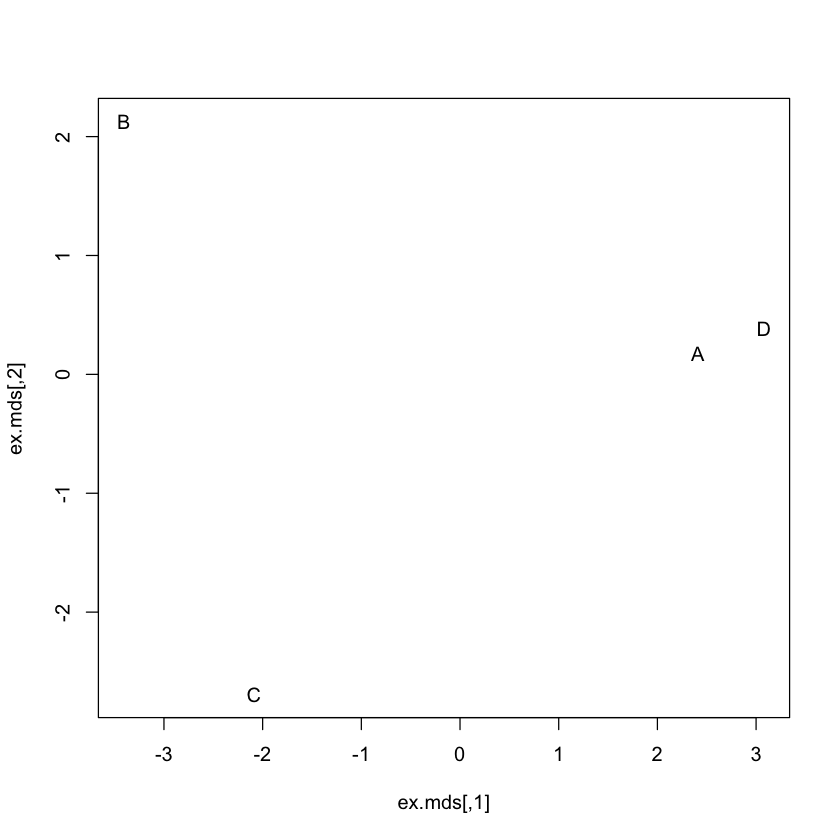

In [7]:
# Visualize clusters
ex.mds <- cmdscale(ex.dist)
plot(ex.mds, type = 'n')
text(ex.mds, c('A', 'B', 'C', 'D'))

In [8]:
# ?list.files  #  get a list of files in a directory, optionally matching a pattern

# Congress Voting

In [49]:
library('foreign')
library('ggplot2')

data.dir <- file.path(".")
data.files <- list.files(data.dir, pattern=".dta")
data.files <- setdiff(data.files, data.files[1])


#[1] "sen102kh.dta" "sen103kh.dta"
#[3] "sen104kh.dta" "sen105kh.dta"
#[5] "sen106kh.dta" "sen107kh.dta"
#[7] "sen108kh.dta" "sen109kh_7.dta"
#[9] "sen110kh.dta" "sen111kh_2008.dta"
#[11] "sen112kh.dta" "sen113kh.dta"
#[13] "sen114kh.dta"

# (a) Extract the .dta data files provided in the final exam .zip file. (Complete data is available at voteview.com/data but in a different format that turns out to be more difficult to use.)

In [10]:
# Add all roll call vote data frames to a single list
rollcall.data <- lapply(data.files,
                        function(f)
                        {
                          read.dta(file.path(data.dir, f), convert.factors = FALSE)
                        })

In [12]:
dim(rollcall.data[[1]])
#[1] 103 647

head(rollcall.data[[12]])
#cong id state dist lstate party eh1 eh2 name V1 V2 V3 ... V638
#1 101 99908 99 0 USA 200 0 0 BUSH 1 1 1 ... 1
#2 101 14659 41 0 ALABAMA 100 0 1 SHELBY, RIC 1 1 1 ... 6
#3 101 14705 41 0 ALABAMA 100 0 1 HEFLIN, HOW 1 1 1 ... 6
#4 101 12109 81 0 ALASKA 200 0 1 STEVENS, TH 1 1 1 ... 1
#5 101 14907 81 0 ALASKA 200 0 1 MURKOWSKI, 1 1 1 ... 6
#6 101 14502 61 0 ARIZONA 100 0 1 DECONCINI, 1 1 1 ... 6

[1] 103 733

cong,id,state,dist,lstate,party,eh1,eh2,name,V0001,⋯,V0493,V0494,V0495,V0496,V0497,V0498,V0499,V0500,V0501,V0502
114,99911,99,0,44,100,NA,NA,70,9,⋯,9,9,9,9,9,9,9,9,9,9
114,40300,81,0,2,200,0,1,66,6,⋯,1,1,6,1,1,1,1,1,6,1
114,41500,81,0,2,200,0,1,90,6,⋯,1,1,1,1,1,1,1,1,1,1
114,49700,41,0,1,200,0,1,86,6,⋯,1,1,1,1,1,1,1,1,6,6
114,94659,41,0,1,200,0,1,88,6,⋯,1,1,1,1,1,1,1,1,6,6
114,20101,42,0,4,200,0,1,9,6,⋯,1,1,1,1,1,1,1,1,1,1


# What the following code does

The voting matrices have values like 1, 6, 9 in them --
and these get translated to zeroes and ones (and -1 when absent).

I believe the "pres" cases handle the very special cases in which
tie votes are broken by the president or vice president.
Vice President Pence actually did this recently.

In [13]:
# This function takes a single data frame of roll call votes and returns a 
# Senator-by-vote matrix.
rollcall.simplified <- function(df)
{
  no.pres <- subset(df, state < 99)
  
  for(i in 10:ncol(no.pres))
  {
    no.pres[,i] <- ifelse(no.pres[,i] > 6, 0, no.pres[,i])
    no.pres[,i] <- ifelse(no.pres[,i] > 0 & no.pres[,i] < 4, 1, no.pres[,i])
    no.pres[,i] <- ifelse(no.pres[,i] > 1, -1, no.pres[,i])
  }
  matrix = no.pres[,10:ncol(no.pres)]
    
  row.names(matrix) = make.names(gsub(' ','',no.pres$name), unique=TRUE)      
  return(as.matrix(matrix))
    
}

rollcall.simple <- lapply(rollcall.data, rollcall.simplified)

In [14]:
# Multiply the matrix by its transpose to get Senator-to-Senator tranformation, 
# and calculate the Euclidan distance between each Senator.
rollcall.dist <- lapply(rollcall.simple, function(m) dist(m %*% t(m)))

# Do the multidimensional scaling
rollcall.mds <- lapply(rollcall.dist,
                       function(d) as.data.frame((cmdscale(d, k = 2)) * -1))

In [15]:
# Add identification information about Senators back into MDS data frames
congresses <- 103:114

for(i in 1:length(rollcall.mds))
{
  names(rollcall.mds[[i]]) <- c("x", "y")
  
  congress <- subset(rollcall.data[[i]], state < 99)
  
  congress.names <- sapply(as.character(congress$name),
                           function(n) strsplit(n, "[, ]")[[1]][1])
  
  rollcall.mds[[i]] <- transform(rollcall.mds[[i]],
                                 name = congress.names,
                                 party = as.factor(congress$party),
                                 congress = congresses[i])
}

head(rollcall.mds[[1]])

#x y name party congress
#2 -11.44068 293.0001 SHELBY 100 101
#3 283.82580 132.4369 HEFLIN 100 101
#4 885.85564 430.3451 STEVENS 200 101
#5 1714.21327 185.5262 MURKOWSKI 200 101
#6 -843.58421 220.1038 DECONCINI 100 101
#7 1594.50998 225.8166 MCCAIN 200 101

,x,y,name,party,congress
HEFLIN,-737.0437,195.57124,HEFLIN,100,103
SHELBY,753.9675,228.58614,SHELBY,100,103
MURKOWSKI,3099.5658,34.50994,MURKOWSKI,200,103
STEVENS,2300.4695,441.42596,STEVENS,200,103
DECONCINI,-1951.3194,-147.79934,DECONCINI,100,103
MCCAIN,3335.0814,-303.89151,MCCAIN,200,103


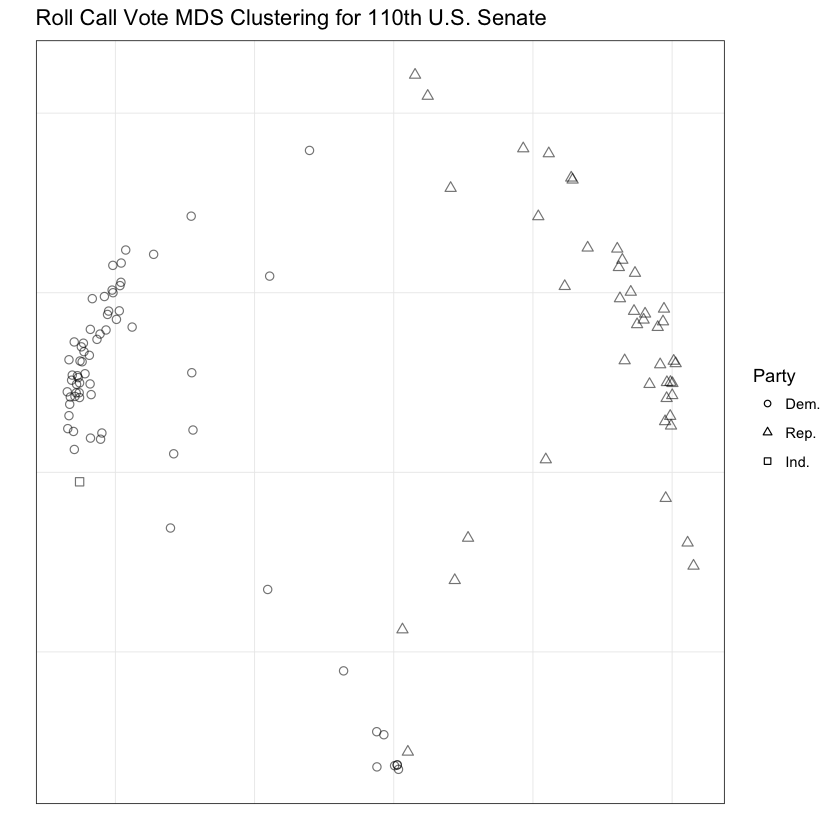

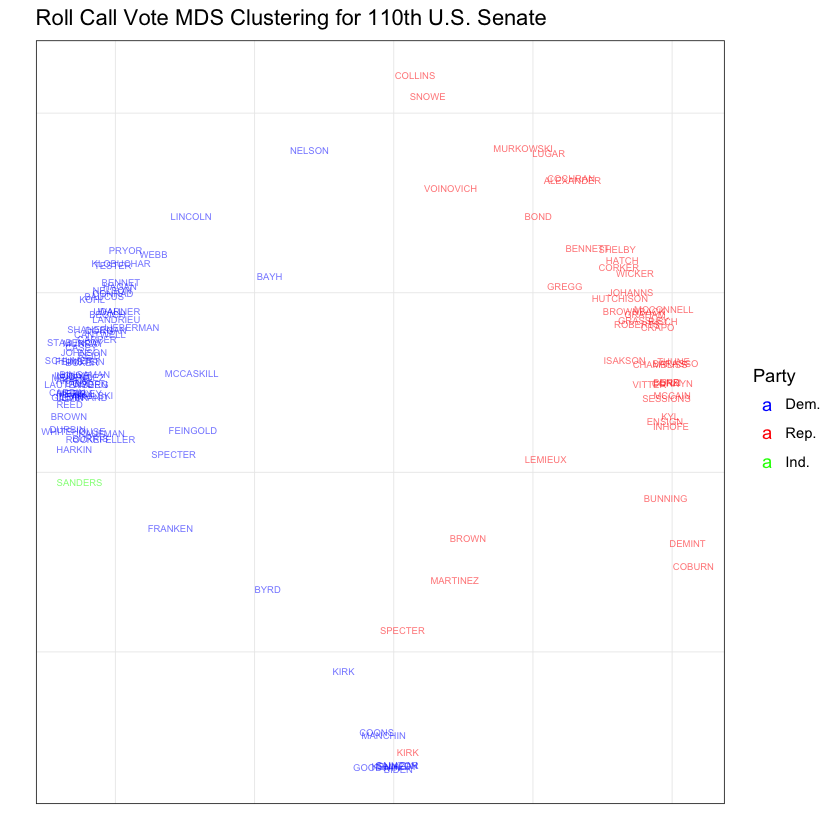

In [18]:
# Create a plot of just the 110th Congress
cong.110 <- rollcall.mds[[9]]

base.110 <- ggplot(cong.110, aes(x = x, y = y)) +
  scale_size(range = c(2,2), guide = 'none') +
  scale_alpha(guide = 'none') +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.grid.major = element_blank()) +
  ggtitle("Roll Call Vote MDS Clustering for 110th U.S. Senate") +
  xlab("") +
  ylab("") +
  scale_shape(name = "Party", breaks = c("100", "200", "328"),
              labels = c("Dem.", "Rep.", "Ind."), solid = FALSE) +
  scale_color_manual(name = "Party", values = c("100" = "blue",
                                                "200" = "red",
                                                "328" = "green"),
                     breaks = c("100", "200", "328"),
                     labels = c("Dem.", "Rep.", "Ind."))

print(base.110 + geom_point(aes(shape = party,
                                alpha = 0.75,
                                size = 2)))
print(base.110 + geom_text(aes(color = party,
                               alpha = 0.75,
                               label = cong.110$name,
                               size = 2)))

# (b) The exam .zip file also includes a Jupyter notebook voting.ipynb for this data. Update this notebook to cover the 103rd through the 114th Congresses.

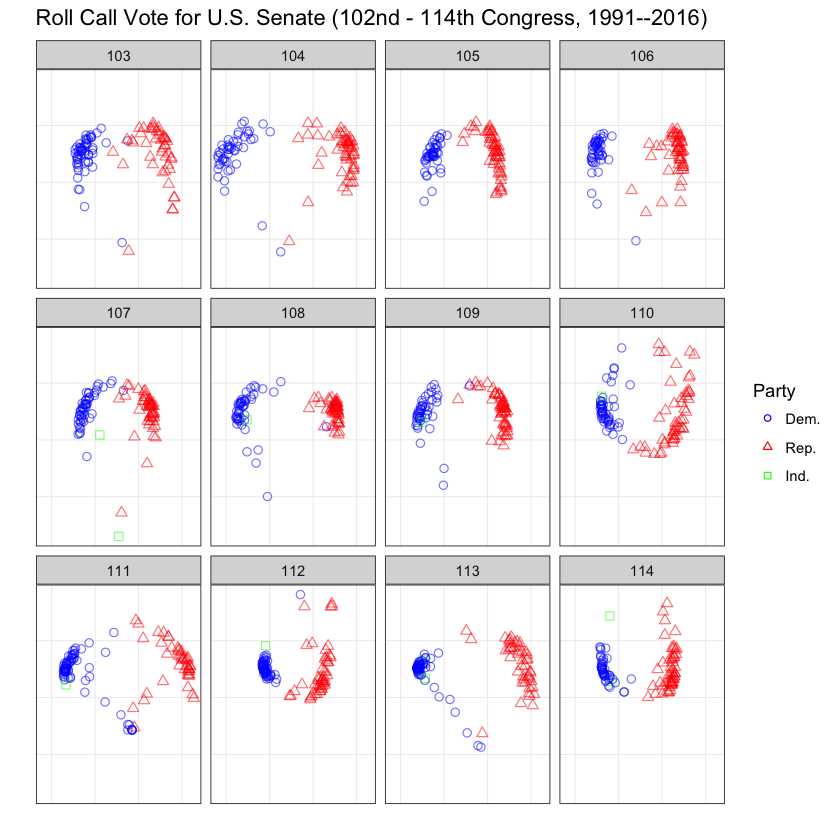

In [19]:
# Create a single visualization of MDS for all Congresses on a grid
all.mds <- do.call(rbind, rollcall.mds)
all.plot <- ggplot(all.mds, aes(x = x, y = y)) +
  geom_point(aes(shape = party, color = party, alpha = 0.75, size = 2)) +
  scale_size(range = c(2, 2), guide = 'none') +
  scale_alpha(guide = 'none') +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.grid.major = element_blank()) +
  ggtitle("Roll Call Vote for U.S. Senate (103nd - 114th Congress, 1991--2016)") +
       xlab("") +
       ylab("") +
       scale_shape(name = "Party",
                   breaks = c("100", "200", "328"),
                   labels = c("Dem.", "Rep.", "Ind."),
                   solid = FALSE) +
       scale_color_manual(name = "Party",
                   values = c("100" = "blue",
                              "200" = "red",
                              "328" = "green"),
                   breaks = c("100", "200", "328"),
                   labels = c("Dem.", "Rep.", "Ind.")) +
      facet_wrap(~ congress)

print(all.plot)

# (c) Extend the notebook to produce a biclustering visualization of the voting history of each Congress (103rd through 114th).

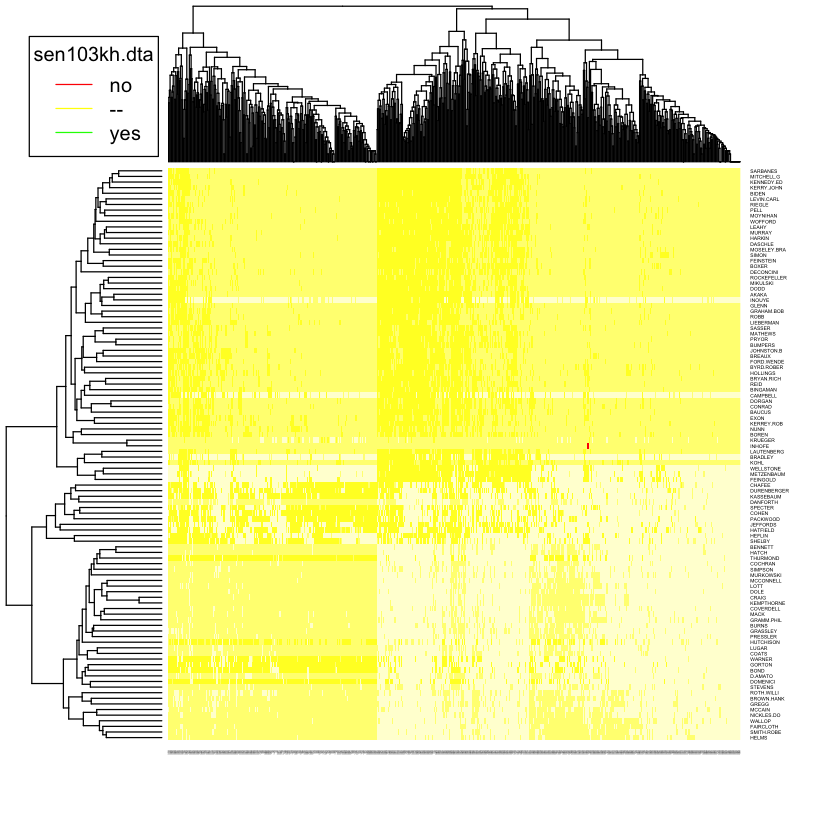

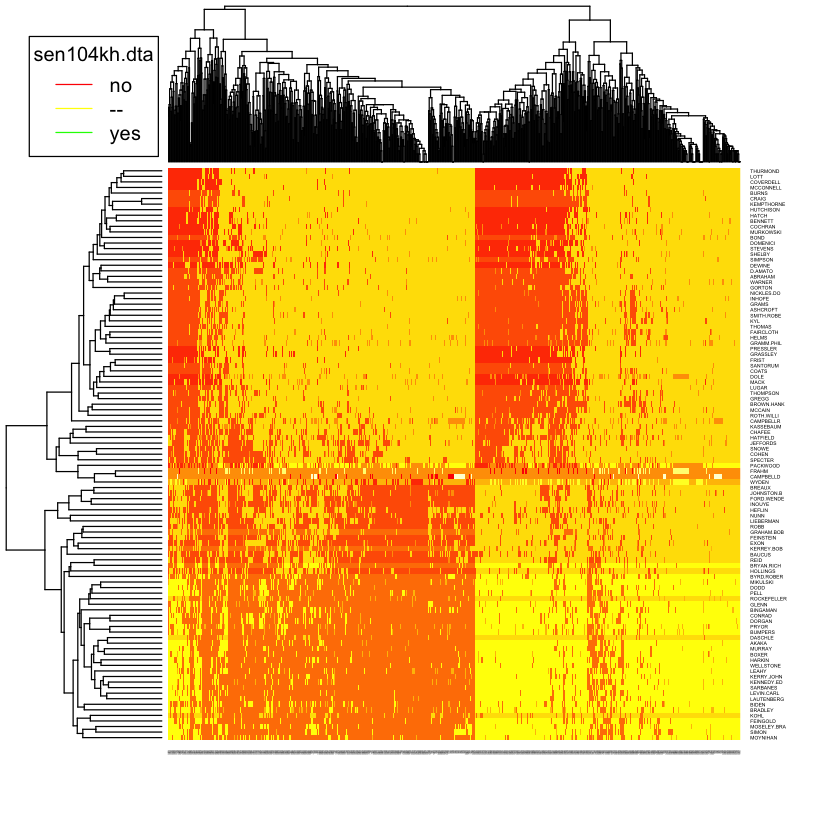

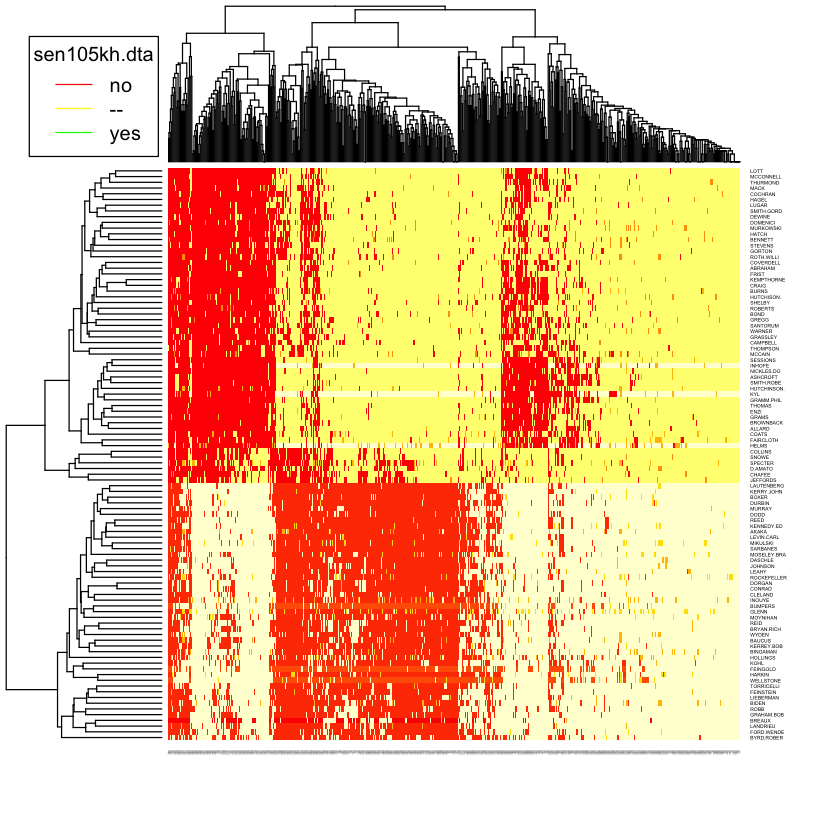

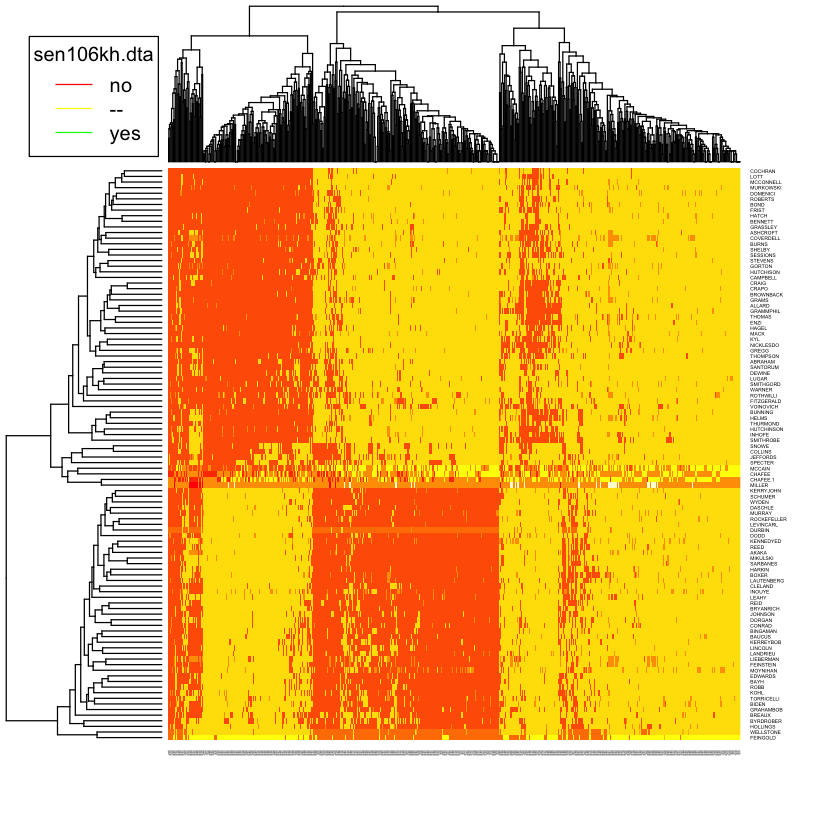

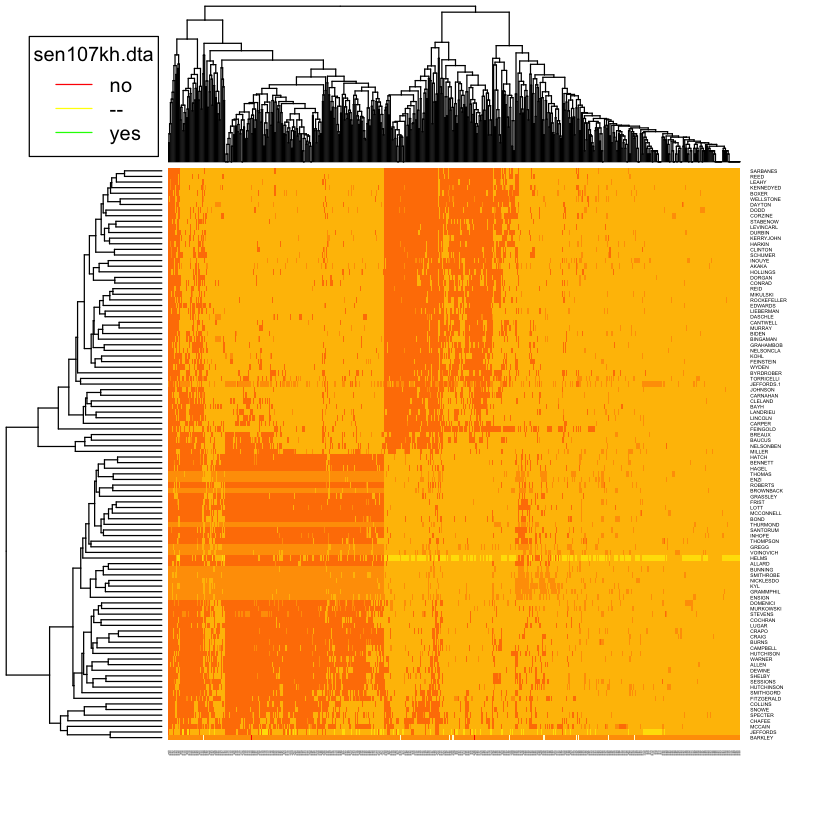

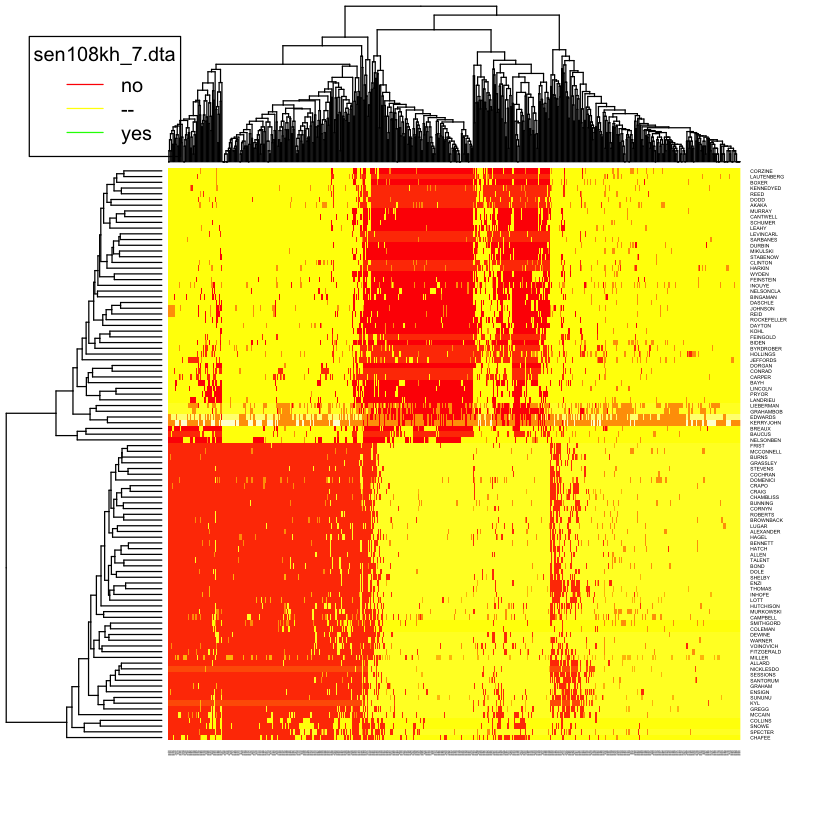

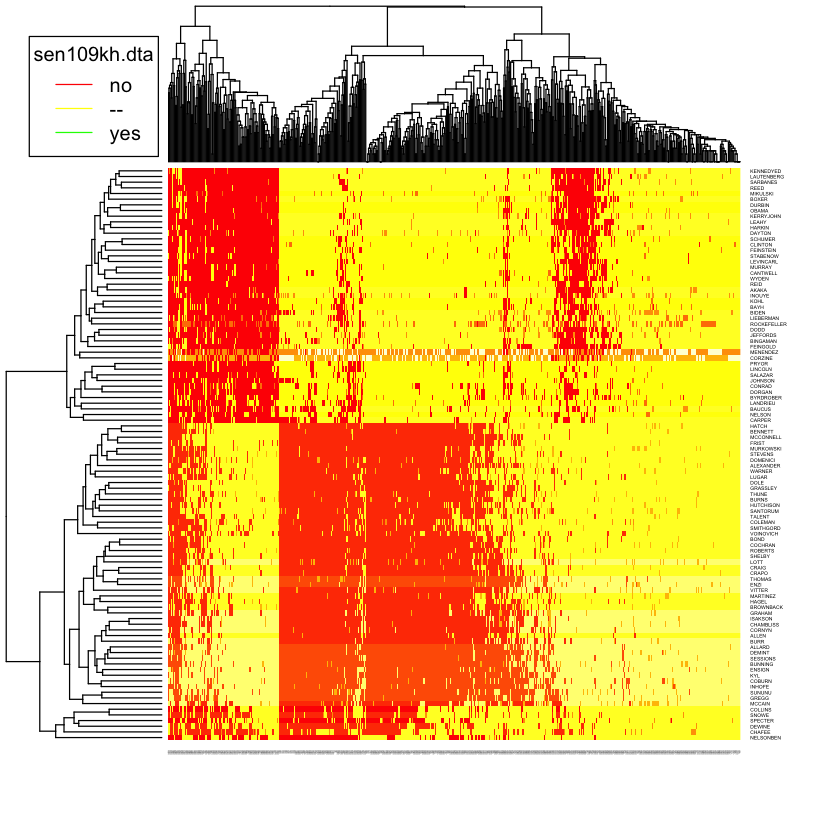

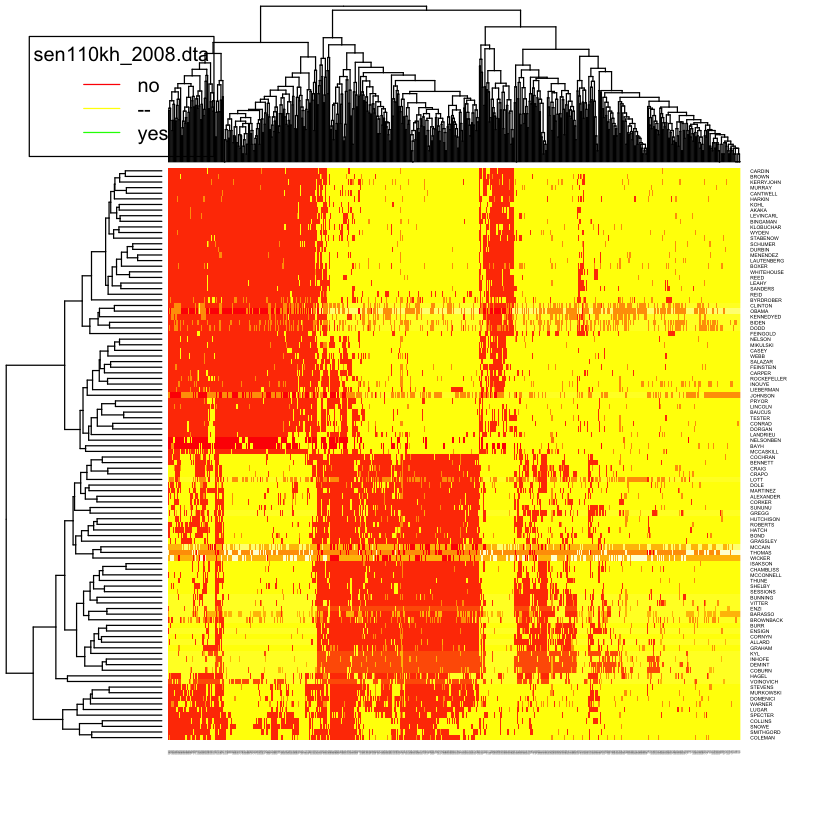

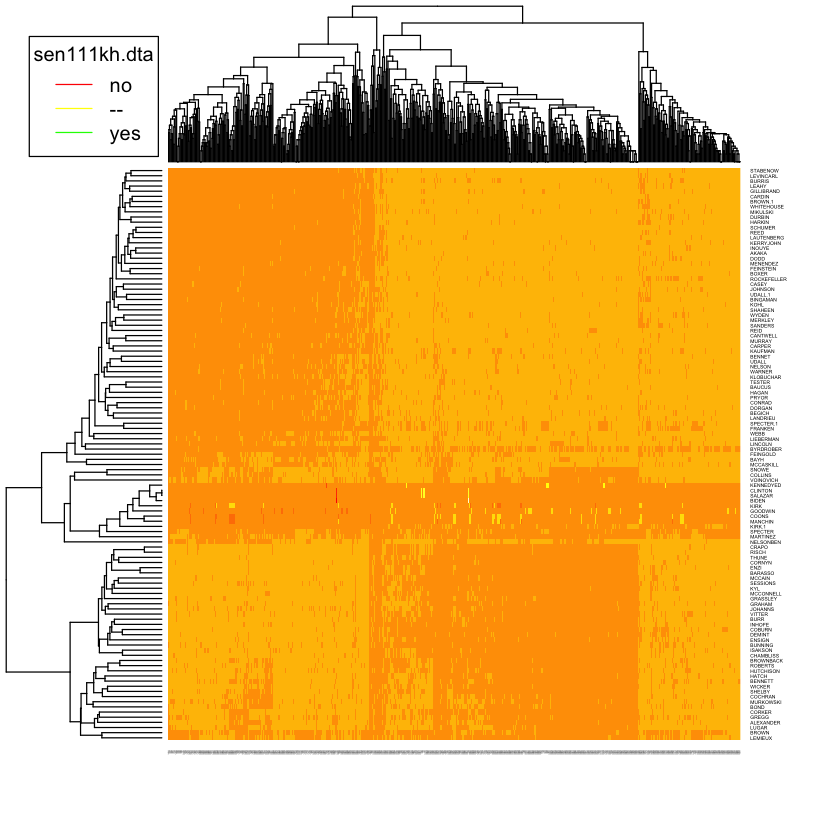

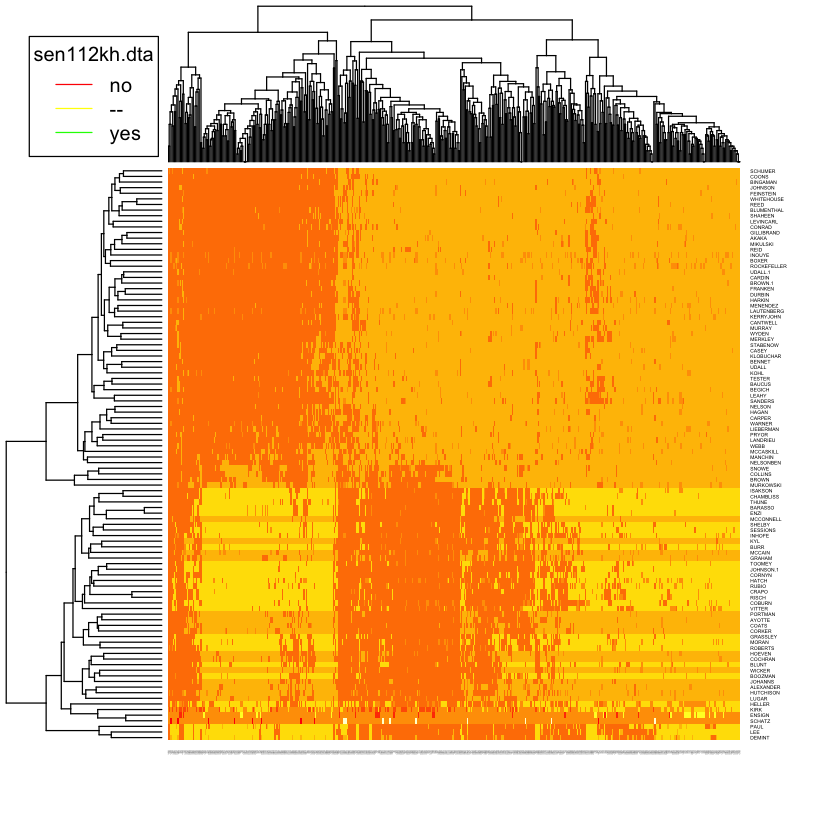

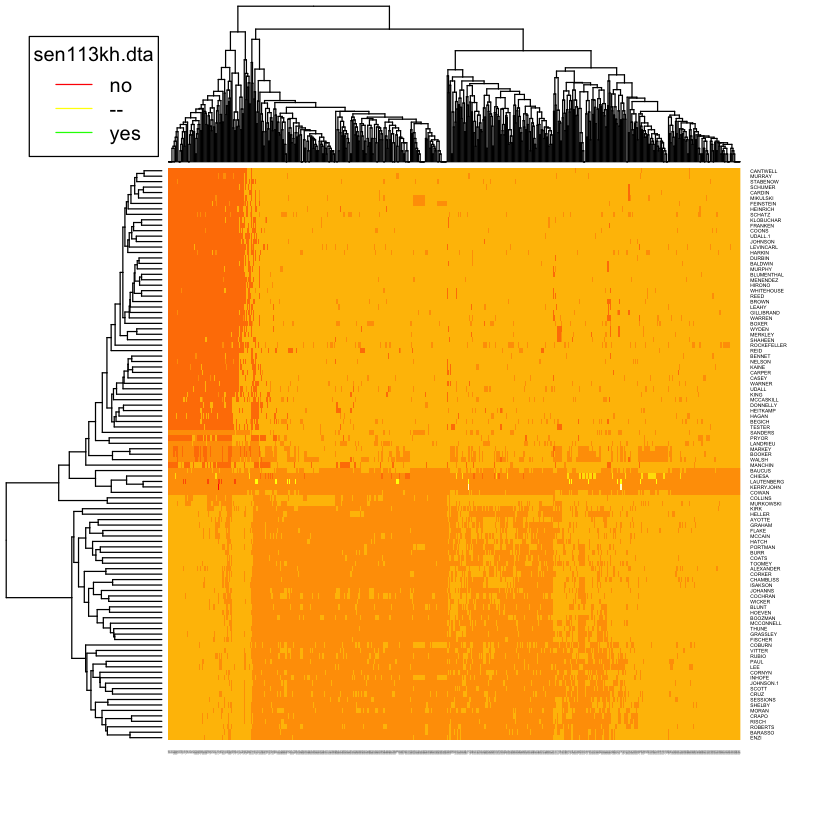

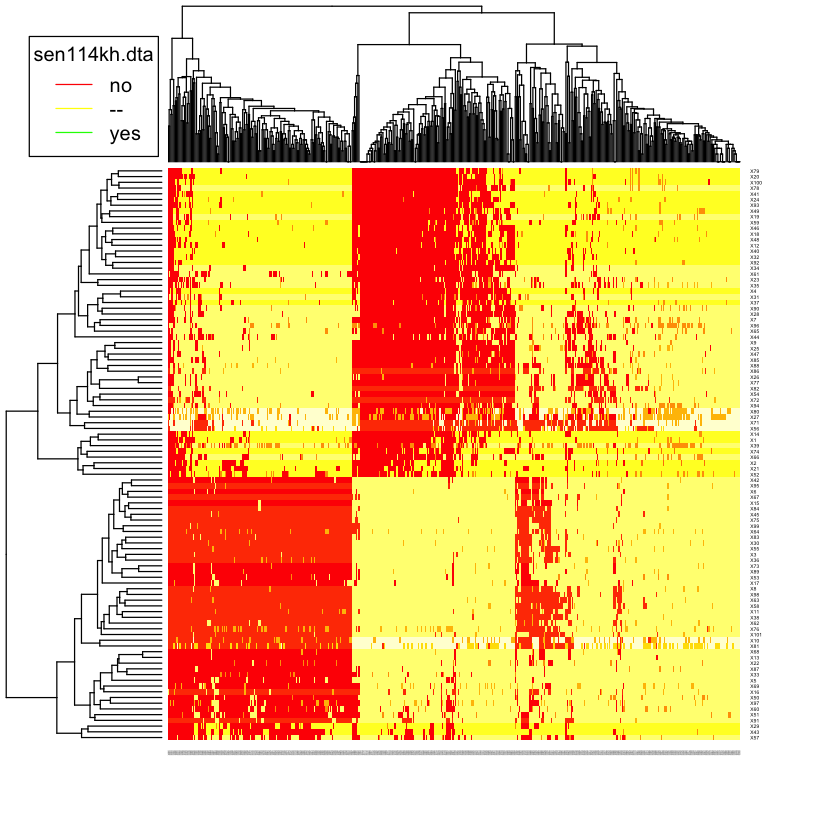

In [48]:

my_palette <- colorRampPalette(c("red","yellow","green"))(n = 3)


for(i in 1:length(rollcall.mds)){ 
    par(xpd=TRUE)
    heatmap(rollcall.simple[[i]], cexRow = 0.3, cexCol = 0.1)
    
    legend("topleft", inset=c(-0.1,-0.1), legend=c("no", "--", "yes"), lty=c(1,1), col=my_palette, title = data.files[i])


}


In [22]:
# This is the code omitted from the chapter.  This is used to create shnazy plots of everything!
if (FALSE) {

for(i in 1:length(rollcall.mds))
{
  mds <- rollcall.mds[[i]]
  congress <- congresses[i]
  plot.title <- paste("Roll Call Vote MDS Clustering for ",
                      congress,
                      " U.S. Senate",
                      sep = "")

  # Build base plot
  mds.plot <- ggplot(mds, aes(x = x, y = y)) +
    scale_size(range = c(2, 2), guide = 'none') +
    scale_alpha(guide = 'none') +
    theme_bw() +
    theme(axis.ticks = element_blank(), 
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          panel.grid.major = element_blank()) +
    ggtitle(plot.title) +
    xlab("") +
    ylab("")
  

  # Build up point and text plots separately
  mds.point <- mds.plot + geom_point(aes(shape = party,
                                         alpha = 0.75,
                                         size = 2))
  mds.text <- mds.plot + geom_text(aes(color = party,
                                       alpha = 0.75,
                                       label = mds$name,
                                       size = 2))
  

  # Fix labels, shapes and colors
  if(length(levels(mds$party)) > 2)
  {
    mds.point <- mds.point + scale_shape(name = "Party",
                                         breaks = c("100", "200", "328"),
                                         labels = c("Dem.", "Rep.", "Ind."),
                                         solid = FALSE)
    mds.text <- mds.text + scale_color_manual(name = "Party",
                                              values = c("100" = "blue",
                                                         "200" = "red",
                                                         "328" = "green"),
                                              breaks = c("100", "200", "328"),
                                              labels = c("Dem.", "Rep.", "Ind."))
  } else {
    mds.point <- mds.point + scale_shape(name = "Party",
                                         breaks = c("100", "200"),
                                         labels = c("Dem.", "Rep."),
                                         solid = FALSE)
    mds.text <- mds.text + scale_color_manual(name = "Party",
                                              values = c("100" = "blue",
                                                         "200" = "red"),
                                              breaks = c("100", "200"),
                                              labels = c("Dem.", "Rep."))
  }
if (FALSE) {
  ggsave(plot = mds.point,
         filename = file.path('images',
                              'senate_plots',
                              paste(congress, "_point.pdf", sep = "")),
         width = 8,
         height = 5)
} else {
   print(mds.point)
}
    
if (FALSE) {
  ggsave(plot = mds.text,
         filename = file.path('images',
                              'senate_plots',
                              paste(congress, "_names.pdf", sep = "")),
         width = 8,
         height = 5)
} else {
  print(mds.text)
}

}
    
}

# (d) extend the notebook to include a model of polarization — a mathematical model of how distant two subsets of voters are — and explain why it is a good measure of polarization.

#### We're going to use polarization index to determine the polarity measurement. The equation is sum of all parties of f(xi - x)^2 where f is the share of vote of the respective party, xi is the right-left score of the respective party, and x is the right-left score of the party system.


#### However, in this problem, since we already hae the x-y coordinates, we can use that to our advantage because it already has incorporated the votes into x-y coordinates (see how it's being calculated above). Therefore, (xi - x)^2 is simply a distance formula between each senator to his/her own party. The shorter distance represents that the senators in their party are uninamously voting for the same thing, which should have higher polarity. The longer distance represents that some senates are agreeing together, which should have lower polarity.

#### checking the timeline below against Roll Call Votes graph above, the spikes are when two major parties are far apart which has larger distance between two clusters (two parties).


In [247]:
polarization <- function(mds){
    #get distinct parties
    distinct_parties = unique(mds$party)
    
    #get total of congress
    total_senators = nrow(mds)
    
    ##loop through each party
    
    polarization_index_list_of_party = list()
    #getting average mean
    total_mean_x = mean(mds$x, na.rm=TRUE)
    total_mean_y = mean(mds$y, na.rm=TRUE)
    
    for (i in distinct_parties){
        #getting subset of mds
        temp_subset = subset(mds, party == i)
        
        #getting subset of senator per party
        party_senators = nrow(temp_subset)
        senator_share = party_senators/total_senators #f
          
        #loop through and calculate the distance for each senator in party
        senator_distance = list()
        counter = 0
        for(s in 1:nrow(temp_subset)){
            distance = sqrt((temp_subset[s,'x'] - total_mean_x)^2 + (temp_subset[s,'y'] - total_mean_y)^2)
            senator_distance = c(senator_distance, distance)
        }
        
        #mean of all senators in party
        senator_distance_mean = do.call(sum, senator_distance) / length(senator_distance)
        
        #append to list
        polarization_index_list_of_party = c(polarization_index_list_of_party,senator_distance_mean)
   
    }
    
    #add up all parties
    polarization = do.call(sum, polarization_index_list_of_party)
    
    return(polarization)
}

In [259]:
for(i in 1:length(data.files))
{
    mds = rollcall.mds[[i]]
    label = paste(c("Polarization of Congress", rollcall.data[[i]][,1][1], ": ", polarization(mds)), collapse = " ")
    cat(label, "\n")
}


Polarization of Congress 103 :  4994.00447965487 
Polarization of Congress 104 :  7465.33078386098 
Polarization of Congress 105 :  4186.30229820747 
Polarization of Congress 106 :  5383.34973119955 
Polarization of Congress 107 :  5928.17492972602 
Polarization of Congress 108 :  9162.55108518469 
Polarization of Congress 109 :  8148.77824038774 
Polarization of Congress 110 :  7384.44655641715 
Polarization of Congress 111 :  10425.7169735783 
Polarization of Congress 112 :  5590.20973807481 
Polarization of Congress 113 :  9466.71174340699 
Polarization of Congress 114 :  6564.39462744753 


# (f) plot the timeline showing the value of your polarization measure for each Congress

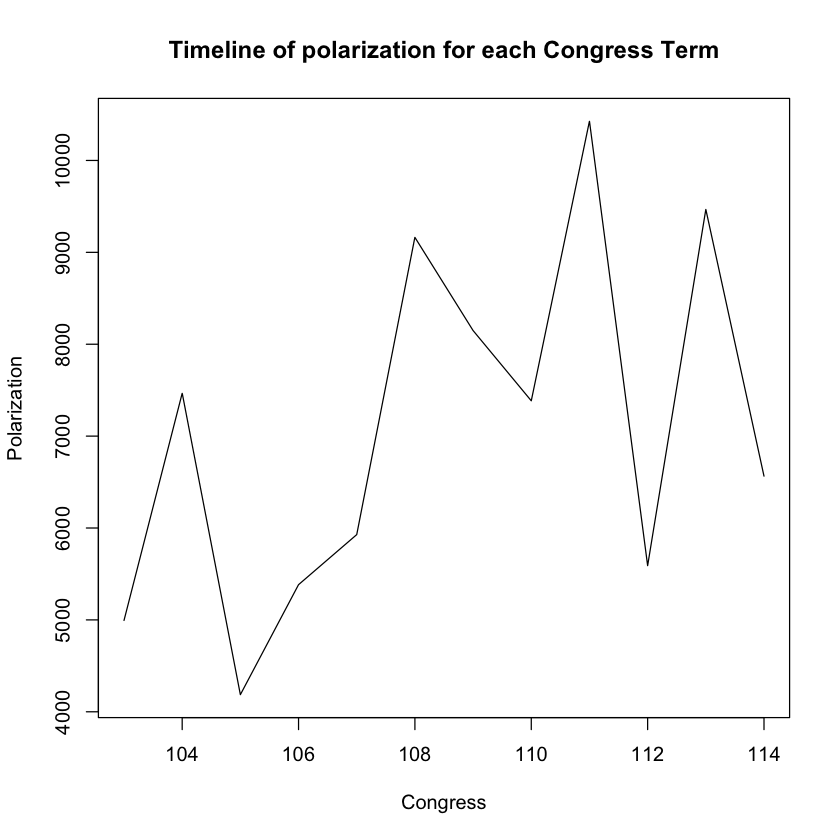

In [265]:
congress <- numeric(0)
poly <- numeric(0)
for(i in 1:length(data.files)){
    mds = rollcall.mds[[i]]
    congress = c(congress, rollcall.data[[i]][,1][1])
    poly = c(poly, polarization(mds))
}
plot(congress, poly, type="l", main="Timeline of polarization for each Congress Term", xlab="Congress", ylab="Polarization") 